In [1]:
### DEFINE VARIABLES
### DEFINE VARIABLES
### DEFINE VARIABLES
import os

## Which scaffold to visualise?
#scaffold = "SymbC1.scaffold1937"
#scaffold = "SymbC1.scaffold1429"
#scaffold = "SymbC1.scaffold2148"
#scaffold = "SymbC1.scaffold3829"
#scaffold = "SymbC1.scaffold252"
#scaffold = "SymbC1.scaffold288"

# sign with SNPs for comp: WT vs SS
#scaffold = "SymbC1.scaffold12930"
#scaffold = "SymbC1.scaffold1429"
#scaffold = "SymbC1.scaffold1154"
#scaffold = "SymbC1.scaffold5652"
#scaffold = "SymbC1.scaffold3949"
#scaffold = "SymbC1.scaffold12047"
#scaffold = "SymbC1.scaffold513"
#scaffold = "SymbC1.scaffold15669"
#scaffold = "SymbC1.scaffold3511"
#scaffold = "SymbC1.scaffold4829"
#scaffold = "SymbC1.scaffold5104"
#scaffold = "SymbC1.scaffold8952"
#scaffold = "SymbC1.scaffold14983"
#scaffold = "SymbC1.scaffold3829"
#scaffold = "SymbC1.scaffold235"

# sign with SNPs for comp: SS8 vs SS3 and SS5
#scaffold = "SymbC1.scaffold3428"
scaffold = "SymbC1.scaffold3829"
#scaffold = "SymbC1.scaffold9320"
#scaffold = "SymbC1.scaffold4254"
#scaffold = "SymbC1.scaffold4973"
#scaffold = "SymbC1.scaffold10186"
#scaffold = "SymbC1.scaffold1364"
#scaffold = "SymbC1.scaffold2826"
#scaffold = "SymbC1.scaffold4088"
#scaffold = "SymbC1.scaffold13213"
#scaffold = "SymbC1.scaffold7372"
#scaffold = "SymbC1.scaffold6664"
#scaffold = "SymbC1.scaffold387"
#scaffold = "SymbC1.scaffold33"
#scaffold = "SymbC1.scaffold2613"
#scaffold = "SymbC1.scaffold2209"
#scaffold = "SymbC1.scaffold2148"
#scaffold = "SymbC1.scaffold182"
#scaffold = "SymbC1.scaffold1530"




## Which GFF file to use for annotations?
input_gff_file = "SymbC1.Gene_Models_with_annotations.GFF3"

## Which VCF file to use for SNP visualisation?
my_vcf_file = "GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf"

## SNP Metadata
SNP_metadata = "SNP_metadata.csv"

### CREATE OUTPUT DIRECTORY
# Create a directory named after the scaffold
scaffold_folder = f"./{scaffold}"
if not os.path.exists(scaffold_folder):
    os.makedirs(scaffold_folder)
print(f"Folder created: {scaffold_folder}")


Folder created: ./SymbC1.scaffold3829


In [2]:
### SUBSET GFF FILE TO SCAFFOLD OF INTEREST
### SUBSET GFF FILE TO SCAFFOLD OF INTEREST
### SUBSET GFF FILE TO SCAFFOLD OF INTEREST

import re

## Define the scaffold
#scaffold = "SymbC1.scaffold1429"
#scaffold = "SymbC1.scaffold1937"

## Define the input and output file names
#input_gff_file = "SymbC1.Gene_Models.GFF3"
gff_subset_no_SNPs = os.path.join(scaffold_folder, f"{scaffold}_SymbC1.Gene_Models_scaffold_test.GFF3")

# Read the contents of the input file
with open(input_gff_file, "r") as f_in:
    data = f_in.read()

# Find all lines containing the specific scaffold in the data
lines_with_scaffold = re.findall(fr".*{scaffold}\s.*", data)

# Write the filtered GFF data to the output file
with open(gff_subset_no_SNPs, "w") as f_out:
    for line in lines_with_scaffold:
        f_out.write(line + "\n")


In [3]:
### SUBSET VCF FILE TO SCAFFOLD OF INTEREST 
### SUBSET VCF FILE TO SCAFFOLD OF INTEREST 
### SUBSET VCF FILE TO SCAFFOLD OF INTEREST

# Define the scaffold
#scaffold = "SymbC1.scaffold1937"

# Define the input VCF file name
#input_vcf_file = "GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf"

# Define the output VCF file name
vcf_file_subset = os.path.join(scaffold_folder, f"{scaffold}_VCF_SUBSET_{my_vcf_file}")

# Open the input VCF file for reading
with open(my_vcf_file, 'r') as vcf_file:
    # Open the new output VCF file for writing
    with open(vcf_file_subset, 'w') as out_file:
        # Iterate through each line in the VCF file
        for line in vcf_file:
            # Check if the line contains the scaffold identifier
            if re.search(scaffold, line):
                # Write the line to the output file
                out_file.write(line)

print(f"Filtered VCF file created: {vcf_file_subset}")

    

### REFORMAT VCF SUBSET TO GFF FORMAT
### REFORMAT VCF SUBSET TO GFF FORMAT
### REFORMAT VCF SUBSET TO GFF FORMAT

# Define the variable for the custom output file name
gff_subset_SNPs_only = os.path.join(scaffold_folder, f"{scaffold}_SNPs_{my_vcf_file}.GFF")

# Open the VCF file for reading
with open(vcf_file_subset, 'r') as vcf_file:
    # Open a new file for writing the converted format
    with open(gff_subset_SNPs_only, 'w') as converted_file:
        # Iterate through each line in the VCF file
        for line in vcf_file:
            # Skip header lines starting with '#'
            if line.startswith('#'):
                continue
            
            # Split the line into fields
            fields = line.strip().split('\t')
            
            # Extract scaffold information from the first field
            scaffold = fields[0]
            
            # Extract other relevant information
            position = fields[1]
            reference_allele = fields[3]
            alternate_allele = fields[4]
            
            # Format the extracted information into the desired format
            converted_line = f"{scaffold}\tEVM\tSNP\t{position}\t{position}\t.\t+\t.\tgene_id={scaffold};Name={scaffold}\n"
            
            # Write the converted line to the new file
            converted_file.write(converted_line)
            
            
            

Filtered VCF file created: ./SymbC1.scaffold3829/SymbC1.scaffold3829_VCF_SUBSET_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf


In [4]:
### SUBSET METADATA
### SUBSET METADATA
### SUBSET METADATA


# Define the output VCF file name
meta_data_subset = os.path.join(scaffold_folder, f"{scaffold}_SNP_metadata.csv")

# Open the input VCF file for reading
with open(SNP_metadata, 'r') as vcf_file:
    # Open the new output VCF file for writing
    with open(meta_data_subset, 'w') as out_file:
        # Iterate through each line in the VCF file
        for line in vcf_file:
            # Check if the line contains the scaffold identifier
            if re.search(scaffold, line):
                # Write the line to the output file
                out_file.write(line)

print(f"Filtered VCF file created: {meta_data_subset}")




### ADD META DATA TO GFF FILES THAT HAS ONLY THE SNP INFORMATION
### ADD META DATA TO GFF FILES THAT HAS ONLY THE SNP INFORMATION
### ADD META DATA TO GFF FILES THAT HAS ONLY THE SNP INFORMATION

import os
import subprocess

gff_subset_SNPs_only_including_metadata = os.path.join(scaffold_folder, f"{scaffold}_SNP_metadata.GFF")

# Read metadata from CSV
metadata_lines = []
with open(meta_data_subset, 'r') as meta_file:
    for line in meta_file:
        metadata_lines.append(line.strip())

# Read GFF file and add metadata
with open(gff_subset_SNPs_only, 'r') as gff_file:
    with open(gff_subset_SNPs_only_including_metadata, 'w') as output_file:
        for gff_line, metadata_line in zip(gff_file, metadata_lines):
            gff_fields = gff_line.strip().split('\t')
            metadata_fields = metadata_line.strip().split('\t')
            Scaffold_Length, impact, category, annotation, GLM_padjust, star = metadata_fields[4], metadata_fields[8], metadata_fields[9], metadata_fields[11], metadata_fields[18], metadata_fields[19] 
            gff_fields[8] += f";Scaffold_Length={Scaffold_Length};impact={impact};category={category};annotation={annotation};padjust={GLM_padjust};star={star}"
            output_file.write('\t'.join(gff_fields) + '\n')

print(f"Merged GFF file created: {gff_subset_SNPs_only_including_metadata}")

Filtered VCF file created: ./SymbC1.scaffold3829/SymbC1.scaffold3829_SNP_metadata.csv
Merged GFF file created: ./SymbC1.scaffold3829/SymbC1.scaffold3829_SNP_metadata.GFF


In [5]:
# COMBINE GFF SUBSET WITH GFF THAT SHOWS SNPs
# COMBINE GFF SUBSET WITH GFF THAT SHOWS SNPs
# COMBINE GFF SUBSET WITH GFF THAT SHOWS SNPs


gff_subset_concatenated_with_SNPs = os.path.join(scaffold_folder, f"{scaffold}_concatenated_output.gff")

# Concatenate the VCF subset and GFF files into the final output file
with open((gff_subset_concatenated_with_SNPs), 'w') as final_out_file:
    # First, write the contents of the VCF subset file
    with open((gff_subset_no_SNPs), 'r') as vcf_subset_file:
        for line in vcf_subset_file:
            final_out_file.write(line)
    
    # Then, write the contents of the GFF file
    with open((gff_subset_SNPs_only_including_metadata), 'r') as gff_file:
        for line in gff_file:
            final_out_file.write(line)


print(f"Final concatenated file created: {gff_subset_concatenated_with_SNPs}")        


Final concatenated file created: ./SymbC1.scaffold3829/SymbC1.scaffold3829_concatenated_output.gff


Number of rows containing 'SNP' in the GFF file: 31
Number of significant SNPs with GLM_padjust < 0.01: 6


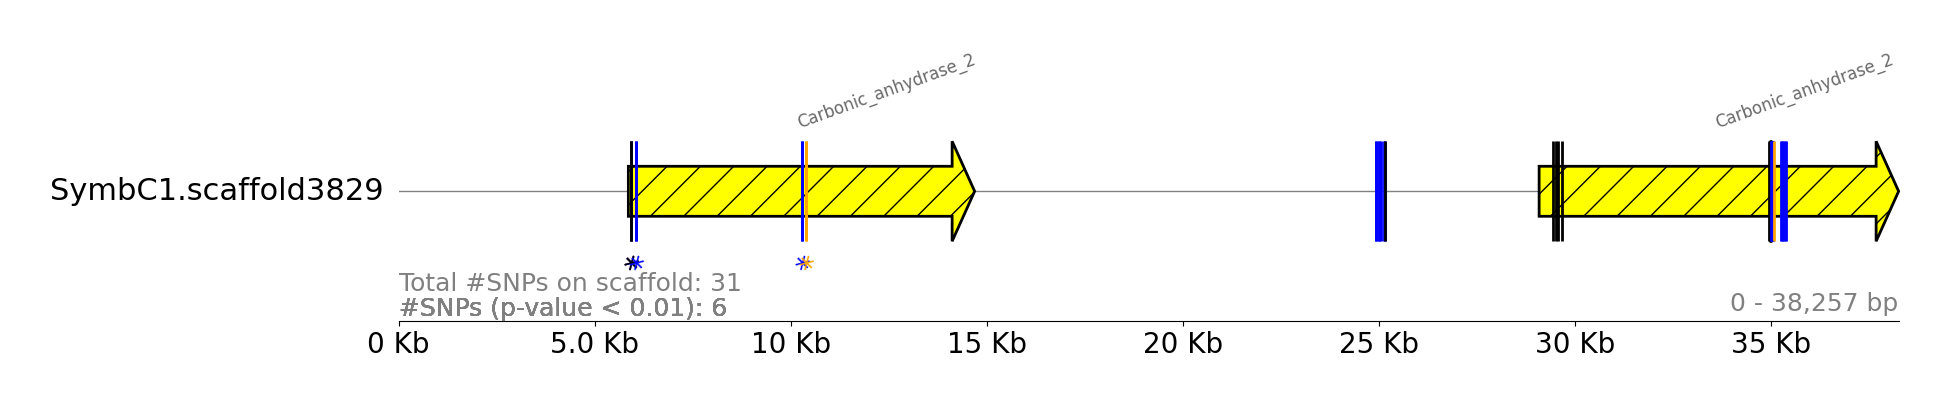

In [17]:
# VISUALISE ONE FULL SCAFFOLD | OVERVIEW
# VISUALISE ONE FULL SCAFFOLD | OVERVIEW
# VISUALISE ONE FULL SCAFFOLD | OVERVIEW

from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff
from pygenomeviz.utils import load_example_gff_file, is_pseudo_feature
import matplotlib.image as mpimg
import matplotlib.pyplot as plt



#gff_file_path = "/home/patrickbuerger/Documents/3_SNPs/2023/FILES/SYMBIONT/AF_15000/SymbC1.Gene_Models_scaffold_SymbC1.scaffold1429.GFF3"
#gff_file = load_example_gff_file(gff_file_path)
#gff = Gff(gff_file)

#gff = Gff("SymbC1.Gene_Models_scaffold_SymbC1.scaffold1429.GFF3")
gff = Gff(gff_subset_concatenated_with_SNPs)

# Count the number of rows in the GFF file that contain the word "SNP"
with open(gff_subset_concatenated_with_SNPs, 'r') as file:
    snp_count = sum(1 for line in file if 'SNP' in line.strip())
# Print the number of rows containing "SNP" to verify
print(f"Number of rows containing 'SNP' in the GFF file: {snp_count}")


# Count the number of SNPs with GLM_padjust below 0.01 in the GFF file
snp_count_below_0_01 = 0
with open(gff_subset_concatenated_with_SNPs, 'r') as file:
    for line in file:
        if 'SNP' in line.strip():
            fields = line.strip().split('\t')
            if len(fields) > 8:  # Ensure there is an attributes column
                attributes = fields[8]
                for attribute in attributes.split(';'):
                    if attribute.startswith('padjust='):
                        padjust_value = float(attribute.split('=')[1])
                        if padjust_value < 0.01:
                            snp_count_below_0_01 += 1

# Print the number of significant SNPs to verify
print(f"Number of significant SNPs with GLM_padjust < 0.01: {snp_count_below_0_01}")


gv = GenomeViz(fig_track_height=1, feature_track_ratio=1)
### THIS CHANGES THE BOTTOM MOST SCALE FOR THE WHOLE SCAFFOLD
gv.set_scale_xticks(labelsize=20, ymargin=0.8)
#gv.set_scale_bar(ymargin=-0.2)  # Adjust ymargin to reduce the distance between scale bar and tracks

#track.add_sublabel?

# Plot SNPs, genes features for each contig to tracks
for seqid, size in gff.get_seqid2size().items():
    track = gv.add_feature_track(seqid, size, labelsize=22) # THIS CHANGES THE GREY LABEL INDICATING THE SCAFFOLD SIZE
    # Add sublabel with total SNP count
    #track.add_sublabel(text=f"SNPs on {scaffold}", size=20, color="black", pos = "top-left", ymargin = 2)
    track.add_sublabel(size=18, color="grey", pos = "bottom-right", ymargin = 1)
    track.add_sublabel(text=f"Total #SNPs on scaffold: {snp_count}", pos = "bottom-left", size=18, color="grey", ymargin = 0.6)  # Adjust offset as needed
    # SNPs: in different colour depending on IMPACT CATEGORY
    SNP_features = gff.get_seqid2features(feature_type="SNP")[seqid]
    for feature in SNP_features:
        category = str(feature.qualifiers.get("category", [""])[0])
        if category == "HIGH":
            color = "red"
        elif category == "MODERATE":
            color = "orange"
        elif category == "LOW":
            color = "blue"
        else:
            color = "black"
        track.add_features([feature], color=color, plotstyle="bigbox", fc="skyblue", lw=2, text_kws=dict(size=16, color="black"))

    # Gene: yellow with labels
    gene_features = gff.get_seqid2features(feature_type="gene")[seqid]
    for feature in gene_features:
        track.add_features([feature], plotstyle="bigarrow", fc="yellow", lw=2, hatch="/", label_type="annotation", text_kws=dict(size=12, vpos="top", rotation=20, color="dimgrey"))

    # Add * for significant SNPs    
    filtered_SNP_features = [feature for feature in SNP_features if float(feature.qualifiers.get("padjust", [1])[0]) < 0.01]
    for feature in filtered_SNP_features:
        category = str(feature.qualifiers.get("category", [""])[0])
        if category == "HIGH":
            color = "red"
        elif category == "MODERATE":
            color = "orange"
        elif category == "LOW":
            color = "blue"
        else:
            color = "black"
        track.add_features([feature], color=color, plotstyle="bigbox", label_type="star", fc="skyblue", lw=2, text_kws=dict(size=22, vpos="bottom", hpos="right", color=color))
        #track.add_features([feature], plotstyle="bigbox", color=color, lw=0, label="*", text_kws=dict(size=16, color="black"))
        #track.add_features([feature], plotstyle="arrow", fc="yellow", lw=2, hatch="/", label="*", text_kws=dict(size=12, color="dimgrey"))
        track.add_sublabel(text=f"#SNPs (p-value < 0.01): {snp_count_below_0_01}", pos = "bottom-left", size=18, color="grey", ymargin = 1.1)  # Adjust offset as needed

        
# PLOT GRAPHICS IN NOTEBOOK
fig = gv.plotfig()

# Manually adjust space between tracks by altering the position of axes
# Fetch all axes in the figure
axes = fig.get_axes()

# Define the amount of vertical space you want between tracks
space = -13.5

# Adjust positions of the axes to reduce space between them
for i in range(1, len(axes)):
    pos = axes[i].get_position()
    new_pos = [pos.x0, pos.y0 - (i * space), pos.width, pos.height]
    axes[i].set_position(new_pos)


plt.show()  # Show the plot in the notebook (optional)
 
# SAVE PLOT TO DRIVE
gv.savefig(os.path.join(scaffold_folder, f"SNPs_{scaffold}_full_sequence.png"), dpi=200)

#gv.add_feature_track?


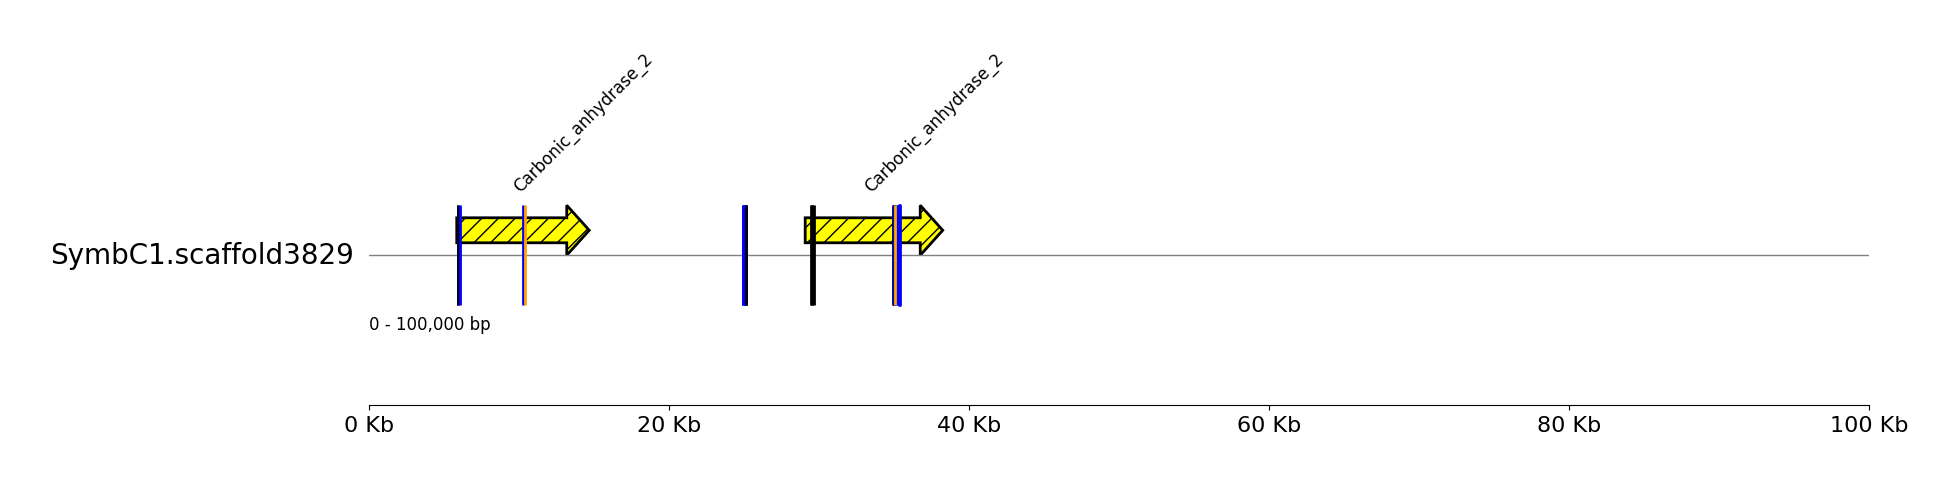

In [7]:

### VISUALISE A DETAILED GENOMIC VIEW OF A SCAFFOLD | PART
### VISUALISE A DETAILED GENOMIC VIEW OF A SCAFFOLD | PART
### VISUALISE A DETAILED GENOMIC VIEW OF A SCAFFOLD | PART

from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff
from pygenomeviz.utils import load_example_gff_file

#gff_file = load_example_gff_file("escherichia_coli.gff.gz")
#gff = Gff(gff_file)
#gff = Gff("SymbC1.Gene_Models_scaffold_SymbC1.scaffold1429.GFF3")
gff = Gff(gff_subset_concatenated_with_SNPs)

gv = GenomeViz()
#gv.set_scale_bar(ymargin=0.5)
gv.set_scale_xticks(labelsize=16)


target_ranges = (0, 100000)
track = gv.add_feature_track(name=seqid, segments=target_ranges)
track.set_segment_sep(symbol="//")

for segment in track.segments:
    segment.add_sublabel()
    # Plot gene features
    gene_features = gff.extract_features(feature_type="gene", target_range=segment.range)
    segment.add_features(gene_features, label_type="annotation", hatch="//", fc="yellow", lw=2.0)

    # Plot SNPs: in different colour depending on IMPACT CATEGORY
    SNP_features = gff.extract_features(feature_type="SNP", target_range=segment.range)
    for feature in SNP_features:
        category = str(feature.qualifiers.get("category", [""])[0])
        if category == "HIGH":
            color = "red"
        elif category == "MODERATE":
            color = "orange"
        elif category == "LOW":
            color = "blue"
        else:
            color = "black"
        segment.add_features(feature, color=color, plotstyle="bigbox", fc="skyblue", lw=2, text_kws=dict(size=10, color="black"))

    
# PLOT GRAPHICS IN NOTEBOOK
fig = gv.plotfig()

# SAVE PLOT TO DRIVE
gv.savefig(os.path.join(scaffold_folder, f"SNPs_{scaffold}_selected_part_1.jpg"), dpi=200)


In [8]:
## Clear Memory and reset run for the next
#reset -f